In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [ ]:
# boston_df.columns
# boston_df.head
# boston_df.info()

<AxesSubplot:title={'center':'Median value of owner-occupied homes'}>

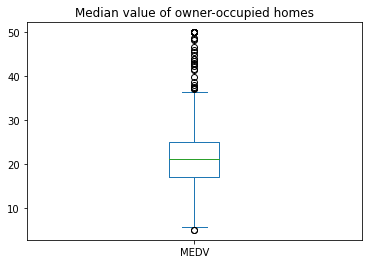

In [14]:
boston_df['MEDV'].plot(kind='box', title='Median value of owner-occupied homes')


<AxesSubplot:title={'center':'Charles River variable count'}, xlabel='CHAS'>

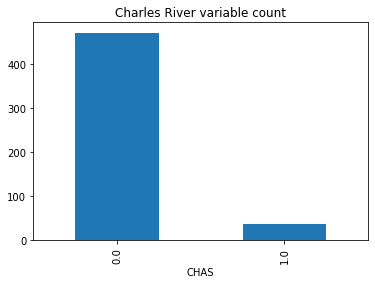

In [23]:
boston_df['CHAS'].value_counts().plot(kind='bar', title='Charles River variable count')

[Text(1, 0, '35 to 70'), Text(2, 0, '70 plus'), Text(3, 0, 'below 35')]

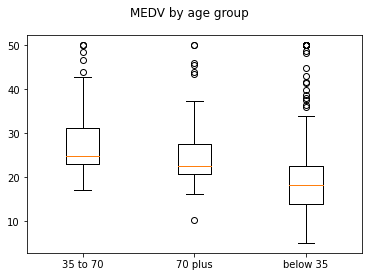

In [79]:
bins = np.array([0, 35, 70, 10000])
boston_df['AGE_BINNED1'] = pd.cut(boston_df['AGE'], bins)

unique_bins = boston_df['AGE_BINNED1'].unique()
DataFrameDict = {elem : pd.DataFrame() for elem in unique_bins}
for key in DataFrameDict.keys():
    DataFrameDict[key] = boston_df[:][boston_df.AGE_BINNED1 == key]

new_dict = {i: DataFrameDict[k] for i, k in enumerate(sorted(DataFrameDict.keys()))}
new2_dict = dict()
new2_dict['35 to 70'] = new_dict[0]
new2_dict['70 plus'] = new_dict[1]
new2_dict['below 35'] = new_dict[2]

new3_dict = new2_dict
for elem in new2_dict.keys():
    new3_dict[elem] = new2_dict[elem]['MEDV']

# new3_dict['35 to 70']

fig, ax = plt.subplots()
fig.suptitle('MEDV by age group')
ax.boxplot(new3_dict.values())
ax.set_xticklabels(new3_dict.keys())


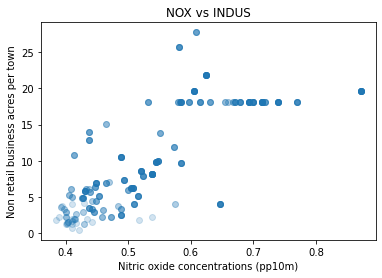

In [77]:
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.2)
plt.title("NOX vs INDUS")
plt.xlabel("Nitric oxide concentrations (pp10m)")
plt.ylabel("Non retail business acres per town")
plt.show()

# In the above cell we can see there is a moderade positive correlation between the two variables. There is also some data binning between 15-20 for the INDUS variable

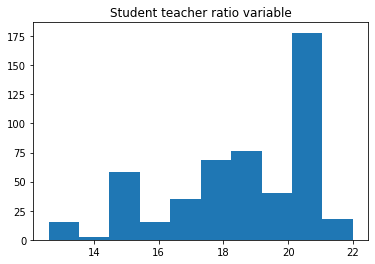

In [80]:
plt.hist(boston_df['PTRATIO'])
plt.title('Student teacher ratio variable')
plt.show()

In [100]:
import scipy.stats

boston_df_1charles = boston_df[:][boston_df.CHAS == 1]
boston_df_0charles = boston_df[:][boston_df.CHAS == 0]

print(
boston_df_1charles['MEDV'].mean(),'\n',
boston_df_1charles['MEDV'].count(),'\n',
boston_df_0charles['MEDV'].mean(),'\n',
boston_df_0charles['MEDV'].count()
)

scipy.stats.ttest_ind(boston_df_1charles['MEDV'], boston_df_0charles['MEDV'])

28.439999999999998 
 35 
 22.093842887473464 
 471


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

# Our hypthesis is that there is a significant difference between median housing prices on/off the Charles. The null hypothesis is that they will have the same median (same population). We can reject the null hypothesis since our p-value is very small.

In [106]:
print(
new3_dict['35 to 70'].mean(), '\n',
new3_dict['35 to 70'].count(), '\n',
new3_dict['70 plus'].mean(), '\n',
new3_dict['70 plus'].count(), '\n',
new3_dict['below 35'].mean(), '\n',
new3_dict['below 35'].count()
)

scipy.stats.f_oneway(new3_dict['35 to 70'], new3_dict['70 plus'], new3_dict['below 35'], axis = 0)

27.77582417582417 
 91 
 24.94765625 
 128 
 19.793379790940765 
 287


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

# Hypothesis is that there is a difference in median values for the different subset populations of home values. The null hypothesis is that there is no difference. Because our p-value in the cell above is very small we can reject the null hypthosis.

In [107]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

# The hypothesis is that the NOX and INDUS variables are related. The null hypothesis is that they are independant of eachother. We cannot reject the null hypothesis in this case from the test results shown in the cell above.

In [108]:
scipy.stats.linregress(boston_df['MEDV'], boston_df['DIS'])

LinregressResult(slope=0.05722208439742031, intercept=2.5056685425580483, rvalue=0.24992873408590396, pvalue=1.2066117273371046e-08, stderr=0.009874749928003147, intercept_stderr=0.240292846694038)

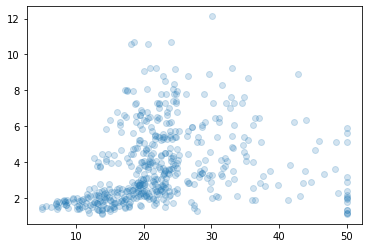

In [109]:
plt.scatter(boston_df['MEDV'], boston_df['DIS'], alpha=0.2)

# We can conclude that there is a relationship (positive) between the two variables and reject the null hypothesis given the results in the cell two above.